In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [4]:
# Define paths to training and validation directories
train_dir = "C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/Driver Drowsiness Dataset (DDD)"
val_dir = "C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/Driver Drowsiness Dataset (DDD)"


# Image data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 41793 images belonging to 2 classes.
Found 41793 images belonging to 2 classes.


In [6]:
# Load InceptionV3 with pre-trained ImageNet weights, excluding the top fully connected layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10


C:\Users\SHIVU KOTI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 1489s 1s/step - accuracy: 0.8066 - loss: 0.5643 - val_accuracy: 0.9706 - val_loss: 0.0900
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 1385s 1s/step - accuracy: 0.9589 - loss: 0.1135 - val_accuracy: 0.9794 - val_loss: 0.0580
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 900s 688ms/step - accuracy: 0.9727 - loss: 0.0749 - val_accuracy: 0.9895 - val_loss: 0.0334
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 938s 716ms/step - accuracy: 0.9769 - loss: 0.0636 - val_accuracy: 0.9750 - val_loss: 0.0675
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 999s 763ms/step - accuracy: 0.9809 - loss: 0.0558 - val_accuracy: 0.9871 - val_loss: 0.0361
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 985s 752ms/step - accuracy: 0.9837 - loss: 0.0459 - val_accuracy: 0.9729 - val_loss: 0.0809
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 1669s 1s/step - accuracy: 0.9830 - loss: 0.0472 - val_accuracy: 0.9940 - val_loss: 0.0190
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 902s 688ms/step - accuracy: 0.9868 - 

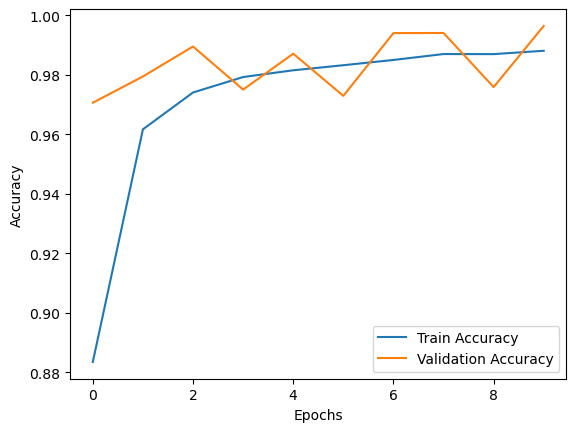

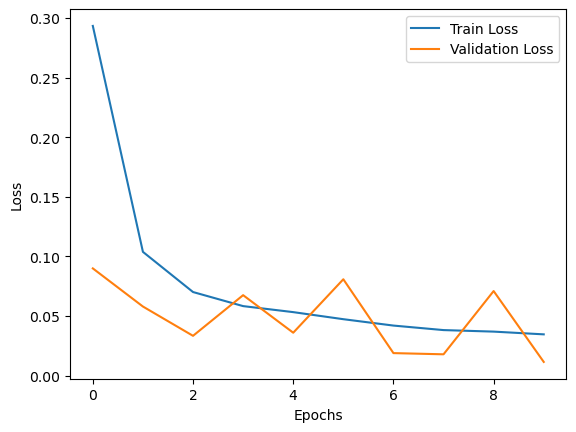

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
model.save("C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/model.keras")


In [9]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/model.keras")


In [10]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the input image
image_path = "C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/Driver Drowsiness Dataset (DDD)/Non Drowsy/a0050.png"

# Load and preprocess the image
img = load_img(image_path, target_size=(150, 150))  # Resize image to match model input size
img_array = img_to_array(img)                       # Convert image to array
img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension
img_array /= 255.0                                  # Normalize pixel values to [0, 1]


In [11]:
# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Prediction: Not Drowsy")
else:
    print("Prediction: Drowsy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Not Drowsy


In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import time
import winsound  # For playing a sound on Windows

# Step 1: Load the trained model
model = load_model("C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/model.keras")

# Step 2: Function to preprocess the frame for prediction
def preprocess_frame(frame):
    # Resize the frame to match the input size of the model (150x150)
    frame_resized = cv2.resize(frame, (150, 150))
    # Convert the frame to an array
    img_array = img_to_array(frame_resized)
    # Add batch size dimension (the model expects a batch)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize pixel values to [0, 1]
    img_array /= 255.0
    return img_array

# Step 3: Start capturing video from the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

alert_triggered = False
alert_start_time = 0

while True:
    # Step 4: Capture each frame from the webcam
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame.")
        break

    # Step 5: Preprocess the frame
    processed_frame = preprocess_frame(frame)

    # Step 6: Make prediction using the model
    prediction = model.predict(processed_frame)

    # Step 7: Label the prediction based on threshold
    if prediction[0][0] > 0.5:
        label = "Not Drowsy"
        color = (0, 255, 0)  # Green for not drowsy
        alert_triggered = False  # Reset alert if the driver is not drowsy
    else:
        label = "Drowsy"
        color = (0, 0, 255)  # Red for drowsy

        # Step 8: Trigger an alert if the driver is detected as drowsy
        if not alert_triggered:
            alert_start_time = time.time()  # Start alert timer
            winsound.Beep(1000, 1000)  # Beep sound for 1 second (1000 Hz)
            alert_triggered = True
        elif alert_triggered and time.time() - alert_start_time > 5:  # If alert is already triggered, beep every 5 seconds
            winsound.Beep(1000, 1000)
            alert_start_time = time.time()

    # Step 9: Display the prediction on the frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Step 10: Show the video feed with prediction
    cv2.imshow("Driver Drowsiness Detection", frame)

    # Step 11: Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 12: Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

KeyboardInterrupt: 

In [13]:
import cv2
import numpy as np
import requests
import webbrowser
import winsound  # For beep sound (works on Windows only)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Step 1: Load the trained drowsiness detection model
model = load_model("C:/Users/SHIVU KOTI/OneDrive/Desktop/VW/model.keras")

# Step 2: Function to preprocess the frame for prediction
def preprocess_frame(frame):
    # Resize the frame to match the input size of the model (150x150)
    frame_resized = cv2.resize(frame, (150, 150))
    # Convert the frame to an array
    img_array = img_to_array(frame_resized)
    # Add batch size dimension (the model expects a batch)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize pixel values to [0, 1]
    img_array /= 255.0
    return img_array

# Step 3: Function to get the approximate location via IP-based geolocation
def get_location():
    try:
        response = requests.get("http://ip-api.com/json/")
        data = response.json()
        if data['status'] == 'success':
            return data['lat'], data['lon']
        else:
            print("Could not retrieve location.")
            return None, None
    except Exception as e:
        print(f"Error fetching location: {e}")
        return None, None

# Step 4: Function to open location on Google Maps
def show_on_map(latitude, longitude):
    if latitude is not None and longitude is not None:
        google_maps_url = f"https://www.google.com/maps/search/?api=1&query={latitude},{longitude}"
        webbrowser.open(google_maps_url)
        print(f"Google Maps opened at location: {latitude}, {longitude}")
    else:
        print("Invalid coordinates; cannot open Google Maps.")

# Step 5: Start capturing video from the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Flag to check if alert actions have been triggered
alert_triggered = False

while True:
    # Capture each frame from the webcam
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame
    processed_frame = preprocess_frame(frame)

    # Make prediction using the model
    prediction = model.predict(processed_frame)

    # Step 6: Check prediction to determine if driver is drowsy
    if prediction[0][0] <= 0.5:  # Assuming 0.5 threshold for drowsiness
        label = "Drowsy"
        color = (0, 0, 255)  # Red for drowsy

        # Trigger beep and open Google Maps only once when drowsiness is first detected
        if not alert_triggered:
            # Play beep sound
            winsound.Beep(1000, 500)  # Beep at 1000 Hz for 500 milliseconds
            
            # Get location and open Google Maps
            lat, lon = get_location()
            show_on_map(lat, lon)
            
            # Set the alert triggered flag to True
            alert_triggered = True

    else:
        label = "Not Drowsy"
        color = (0, 255, 0)  # Green for not drowsy
        
        # Reset the alert flag when driver is not drowsy
        alert_triggered = False

    # Display the prediction on the frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Show the video feed with prediction
    cv2.imshow("Driver Drowsiness Detection", frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Google Maps opened at location: 12.9634, 77.5855
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Google Maps opened at location: 12.9634, 77.5855
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Google Maps opened at location: 12.9634, 77.5855
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━

KeyboardInterrupt: 